In [1]:
# Import & Install Dependencies
# !pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

In [2]:
# Load dependencies!
import os

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
from sklearn.model_selection import KFold

<div class="alert alert-block alert-info">
Data Loading Function!
</div>

In [3]:
# Defining paths
Asthma_File = os.path.join('Data','Archive_2','Asthma','103_2b2_Ar_mc_LittC2SE.wav')
Bronchiectasis_File = os.path.join('Data','Archive_2','Bronchiectasis','111_1b2_Tc_sc_Meditron.wav')
Bronchiolitis_File = os.path.join('Data','Archive_2','Bronchiolitis','149_1b1_Al_sc_Meditron.wav')
COPD_File = os.path.join('Data','Archive_2','COPD','104_1b1_Al_sc_Litt3200.wav')
Healthy_File = os.path.join('Data','Archive_2','Healthy','102_1b1_Ar_sc_Meditron.wav')
LRTI_File = os.path.join('Data','Archive_2','LRTI','108_1b1_Al_sc_Meditron.wav')
Pneumonia_File = os.path.join('Data','Archive_2','Pneumonia','122_2b1_Al_mc_LittC2SE.wav')
URTI_File = os.path.join('Data','Archive_2','URTI','101_1b1_Al_sc_Meditron.wav')

In [4]:
def load_wav(filename):
    # Load wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amp of audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [5]:
asth_wave = load_wav(Asthma_File)
bronchsis_wave = load_wav(Bronchiectasis_File)
bronchtis_wave = load_wav(Bronchiolitis_File)
COPD_wave = load_wav(COPD_File)
health_wave = load_wav(Healthy_File)
LRTI_wave = load_wav(LRTI_File)
Pneu_wave = load_wav(Pneumonia_File)
URTI_wave = load_wav(URTI_File)

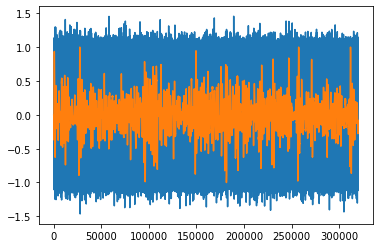

In [6]:
plt.plot(Pneu_wave)
plt.plot(asth_wave)
# plt.plot(bronchsis_wave)
# plt.plot(bronchtis_wave)
# plt.plot(COPD_wave)
# plt.plot(health_wave)
# plt.plot(LRTI_wave)
# plt.plot(URTI_wave)
plt.show()

Wave to Spectrogram

In [7]:
# Defining paths (whole folder)
Asthma = os.path.join('Data','Archive_2','Asthma')
Bronchiectasis = os.path.join('Data','Archive_2','Bronchiectasis')
Bronchiolitis = os.path.join('Data','Archive_2','Bronchiolitis')
# COPD = os.path.join('Data','Archive_2','COPD')
Healthy = os.path.join('Data','Archive_2','Healthy')
LRTI = os.path.join('Data','Archive_2','LRTI')
Pneumonia = os.path.join('Data','Archive_2','Pneumonia')
URTI = os.path.join('Data','Archive_2','URTI')

In [8]:
# Tensorflow Dataset
# Looks for any wav files in each directory
AsthmaTFDS = tf.data.Dataset.list_files(Asthma+'\*.wav')
BronchiectasisTFDS = tf.data.Dataset.list_files(Bronchiectasis+'\*.wav')
BronchiolitisTFDS = tf.data.Dataset.list_files(Bronchiolitis+'\*.wav')
# COPDTFDS = tf.data.Dataset.list_files(COPD+'\*.wav')
HealthyTFDS = tf.data.Dataset.list_files(Healthy+'\*.wav')
LRTITFDS = tf.data.Dataset.list_files(LRTI+'\*.wav')
PneumoniaTFDS = tf.data.Dataset.list_files(Pneumonia+'\*.wav')
URTITFDS = tf.data.Dataset.list_files(URTI+'\*.wav')

In [9]:
# COPDTFDS.as_numpy_iterator().next()

In [10]:
num_classes = 8
def one_hot_label_maker(audio, label):
    one_hot_label = tf.one_hot(label, num_classes)
    return audio, one_hot_label

In [11]:
def debug(a, b):
    print(a)
    print(b)

In [12]:
Asthma_Samples = tf.data.Dataset.zip((AsthmaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(AsthmaTFDS), 0))))

Bronchiectasis_Samples = tf.data.Dataset.zip((BronchiectasisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiectasisTFDS), 1))))

Bronchiolitis_Samples = tf.data.Dataset.zip((BronchiolitisTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(BronchiolitisTFDS), 2))))

# COPD_Samples = tf.data.Dataset.zip((COPDTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(COPDTFDS), 3))))

Healthy_Samples = tf.data.Dataset.zip((HealthyTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(HealthyTFDS), 4))))

LRTI_Samples = tf.data.Dataset.zip((LRTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(LRTITFDS), 5))))

Pneumonia_Samples = tf.data.Dataset.zip((PneumoniaTFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(PneumoniaTFDS), 6))))

URTI_Samples = tf.data.Dataset.zip((URTITFDS, tf.data.Dataset.from_tensor_slices(tf.fill(len(URTITFDS), 7))))

all_data = []
print(len(all_data))
all_data = Asthma_Samples.concatenate(Bronchiectasis_Samples)
print(len(all_data))
all_data = all_data.concatenate(Bronchiolitis_Samples)
print(len(all_data))
# all_data = all_data.concatenate(COPD_Samples)
# print(len(all_data))
all_data = all_data.concatenate(Healthy_Samples)
print(len(all_data))
all_data = all_data.concatenate(LRTI_Samples)
print(len(all_data))
all_data = all_data.concatenate(Pneumonia_Samples)
print(len(all_data))
all_data = all_data.concatenate(URTI_Samples)
print(len(all_data))

0
34
60
130
134
208
254


In [13]:
all_data = all_data.map(one_hot_label_maker)

In [14]:
# all_data = all_data.map(debug)

In [15]:
data_iterator = all_data.shuffle(500).as_numpy_iterator()
for item in all_data:
    print(data_iterator.next())

(b'Data\\Archive_2\\Bronchiectasis\\168_1b1_Al_sc_Meditron.wav', array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Healthy\\182_1b1_Tc_sc_Meditron_1.wav', array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Healthy\\179_1b1_Al_sc_Meditron_1.wav', array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Healthy\\187_1b1_Ll_sc_Meditron.wav', array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Bronchiolitis\\173_1b1_Al_sc_Meditron_1.wav', array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Pneumonia\\140_2b2_Tc_mc_LittC2SE.wav', array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))
(b'Data\\Archive_2\\Pneumonia\\135_2b2_Ar_mc_LittC2SE.wav', array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))
(b'Data\\Archive_2\\Healthy\\182_1b1_Tc_sc_Meditron.wav', array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))
(b'Data\\Archive_2\\Bronchiectasis\\168_1b1_Al_sc_Meditron_1.wav'

Preprocessing and Function Building

In [16]:
# os.listdir(COPD)

In [17]:
def preprocess(file_path, label):
    wav = load_wav(file_path)
    wav = wav[:320000]
    zero_padding = tf.zeros([320000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=256, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [18]:
wav = None
# wav = load_wav(Asthma_File) # 320000
# wav = load_wav(Bronchiectasis_File) # 320000
# wav = load_wav(Bronchiolitis_File) # 320000
# wav = load_wav(COPD_File) # 253696
# wav = load_wav(Healthy_File) # 320000
# wav = load_wav(LRTI_File) # 320000
# wav = load_wav(Pneumonia_File) # 320000
# wav = load_wav(URTI_File) # 320000
wav

In [19]:
filepath, label = Healthy_Samples.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [20]:
# type(label)

In [21]:
spectrogram, label = preprocess(filepath, label)

In [22]:
spectrogram

<tf.Tensor: shape=(2499, 129, 1), dtype=float32, numpy=
array([[[1.4179241e+01],
        [1.1322944e+01],
        [2.8321812e+00],
        ...,
        [5.6360601e-03],
        [2.1235265e-03],
        [1.2531281e-03]],

       [[8.8020401e+00],
        [8.0692415e+00],
        [1.8531149e+01],
        ...,
        [1.7766317e-02],
        [5.7773045e-03],
        [1.5144348e-03]],

       [[3.4250453e+00],
        [9.2617388e+00],
        [1.7637779e+01],
        ...,
        [1.0055069e-02],
        [2.5109870e-03],
        [1.7549992e-03]],

       ...,

       [[2.3336225e+00],
        [3.0266130e+00],
        [6.3277287e+00],
        ...,
        [1.0775301e-02],
        [5.9420434e-03],
        [1.7646551e-03]],

       [[8.3929882e+00],
        [8.0689106e+00],
        [9.0230618e+00],
        ...,
        [6.9374866e-03],
        [8.3456123e-03],
        [1.4395714e-03]],

       [[1.4282270e+01],
        [1.2702798e+01],
        [8.1087742e+00],
        ...,
        [2.4540994

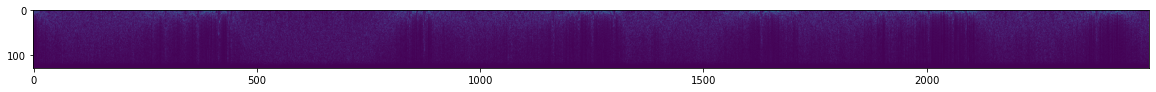

In [23]:
plt.figure(figsize=(20,30))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [24]:
type(label)

numpy.int32

Training and Testing Partitions!

In [25]:
k = 10 # No. of folds for k-fold cross val

In [26]:
# Tensorflow Data Pipeline
all_data = all_data.map(preprocess)
all_data = all_data.cache()
all_data = all_data.shuffle(buffer_size=1000)
all_data = all_data.batch(16)
all_data = all_data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [27]:
len(all_data)

16

In [28]:
kfold = KFold(n_splits=k, shuffle=True)
fold_metrics = []

In [ ]:
def cross_val(model, X, Y, k):
    scoring = ['accuracy','precision','recall','f1','g-mean']
    results = cross_val(estimator=model, Xval = X)


In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

In [ ]:
labels

Building the model!!

In [ ]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(2499, 129,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile('Adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])

In [ ]:
model.summary()

Training Time!!!

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)
# Wanting loss decrease, recall & precision increase
# G-mean, F1

In [ ]:
hist.history

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'tab:purple')
plt.plot(hist.history['val_loss'], 'deeppink')

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'tab:purple')
plt.plot(hist.history['val_precision'], 'deeppink')

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'tab:purple')
plt.plot(hist.history['val_recall'], 'deeppink')

In [ ]:
x_test, y_test = test.as_numpy_iterator().next()

In [ ]:
y_test.shape

In [ ]:
yhat = model.predict(x_test)

In [ ]:
yhat

In [ ]:
def get_disease(label_classification):
    if label_classification == 0:
        return "Asthma"
    elif label_classification == 1:
        return "Bronchiectasis"
    elif label_classification == 2:
        return "Bronchiolitis"
    elif label_classification == 3:
        return "COPD"
    elif label_classification == 4:
        return "Healthy"
    elif label_classification == 5:
        return "LRTI"
    elif label_classification == 6:
        return "Pneumonia"
    elif label_classification == 7:
        return "URTI"
    else:
        return "Unknown"

In [ ]:
max_indices = np.argmax(yhat[:, 1:], axis=1)

group_label = max_indices + 1

for i, label in enumerate(group_label):
    print(f"Clip {i} is predicted as being {get_disease(label)}")

In [ ]:
max_indices_control = np.argmax(y_test[:, 1:], axis=1)

group_label_control = max_indices_control + 1

for i, label in enumerate(group_label_control):
    print(f"Clip {i} is {get_disease(label)}")

In [ ]:
# cross validation - statistical significance
# Ensure eroneous samples are represented, or small groups

In [ ]:
# Save machine learning file
# Read me file
# Images - appendix
# Screen capture - Talk through code

In [ ]:
# Randomly select audio from COPD, that used instead of mass amount of COPD